In [1]:
import pandas as pd
import numpy as np
from scipy.stats import poisson 
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.metrics import confusion_matrix as cm
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB  
from sklearn.naive_bayes import CategoricalNB 
from sklearn.metrics import accuracy_score as acc
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML


In [2]:
def league_matches(x):
    dfList = []
    for i in range(5, 21):
        df=pd.read_csv("http://www.football-data.co.uk/mmz4281/{0:02d}{1:02d}".format(i,i+1)+f"/{x}.csv",
                       error_bad_lines=False,encoding='latin1')
        
        df = df[['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HS', 'AS','B365H', 'B365D', 'B365A']]
        dfList.append(df)
        Data = dfList[0].append(dfList[1:])
    return Data

      

In [3]:
%%time
Bundesliga=league_matches('D1')
EPL=league_matches('E0')
LaLiga=league_matches('SP1')
SerieA=league_matches('I1')

CPU times: user 1.58 s, sys: 196 ms, total: 1.77 s
Wall time: 1min 4s


In [4]:
Bundesliga

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,B365H,B365D,B365A
0,05/08/05,Bayern Munich,M'gladbach,3,0,H,19,10,1.30,5.00,9.50
1,06/08/05,Duisburg,Stuttgart,1,1,D,11,11,2.75,3.25,2.25
2,06/08/05,FC Koln,Mainz,1,0,H,14,19,2.10,3.25,3.00
3,06/08/05,Hamburg,Nurnberg,3,0,H,12,17,1.57,3.40,5.50
4,06/08/05,Hannover,Hertha,2,2,D,12,15,2.40,3.20,2.60
...,...,...,...,...,...,...,...,...,...,...,...
22,03/10/2020,Stuttgart,Leverkusen,1,1,D,11,15,3.80,3.80,1.85
23,03/10/2020,Werder Bremen,Bielefeld,1,0,H,7,10,2.15,3.50,3.30
24,03/10/2020,RB Leipzig,Schalke 04,4,0,H,21,4,1.25,6.50,10.00
25,04/10/2020,Wolfsburg,Augsburg,0,0,D,17,9,2.00,3.60,3.70


In [5]:
EPL

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,B365H,B365D,B365A
0,13/08/05,Aston Villa,Bolton,2.0,2.0,D,3.0,13.0,2.30,3.25,3.00
1,13/08/05,Everton,Man United,0.0,2.0,A,10.0,12.0,5.00,3.40,1.72
2,13/08/05,Fulham,Birmingham,0.0,0.0,D,15.0,7.0,2.37,3.25,2.87
3,13/08/05,Man City,West Brom,0.0,0.0,D,15.0,13.0,1.72,3.40,5.00
4,13/08/05,Middlesbrough,Liverpool,0.0,0.0,D,4.0,16.0,2.87,3.20,2.40
...,...,...,...,...,...,...,...,...,...,...,...
33,04/10/2020,Southampton,West Brom,2.0,0.0,H,13.0,5.0,1.72,3.80,4.75
34,04/10/2020,Arsenal,Sheffield United,2.0,1.0,H,6.0,6.0,1.57,4.00,6.00
35,04/10/2020,Wolves,Fulham,1.0,0.0,H,14.0,10.0,1.50,4.00,7.50
36,04/10/2020,Man United,Tottenham,1.0,6.0,A,5.0,22.0,1.85,3.80,4.00


In [6]:
LaLiga

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,B365H,B365D,B365A
0,27/08/05,Alaves,Barcelona,0,0,D,5,17,7.00,3.75,1.50
1,27/08/05,Ath Bilbao,Sociedad,3,0,H,10,9,2.00,3.25,3.25
2,27/08/05,Valencia,Betis,1,0,H,9,14,2.00,3.25,3.25
3,28/08/05,Ath Madrid,Zaragoza,0,0,D,16,9,1.72,3.40,4.00
4,28/08/05,Cadiz,Real Madrid,1,2,A,15,17,7.50,4.00,1.44
...,...,...,...,...,...,...,...,...,...,...,...
38,04/10/2020,Osasuna,Celta,2,0,H,14,9,2.70,3.10,2.75
39,04/10/2020,Alaves,Ath Bilbao,1,0,H,8,8,3.30,2.90,2.37
40,04/10/2020,Levante,Real Madrid,0,2,A,11,13,6.00,4.50,1.50
41,04/10/2020,Cadiz,Granada,1,1,D,14,13,3.00,3.00,2.60


In [7]:
EPL.isnull().sum()

Date        1
HomeTeam    1
AwayTeam    1
FTHG        1
FTAG        1
FTR         1
HS          1
AS          1
B365H       1
B365D       1
B365A       1
dtype: int64

In [8]:
EPL_isna = EPL[EPL.isna().any(axis=1)]

In [9]:
EPL_isna

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,B365H,B365D,B365A
380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
EPL=EPL.dropna()

In [11]:
SerieA_isna = SerieA[SerieA.isna().any(axis=1)]

In [12]:
SerieA_isna

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,B365H,B365D,B365A
85,26/10/05,Lazio,Chievo,2.0,2.0,D,NaN,NaN,2.00,3.00,4.00
132,04/12/05,Fiorentina,Juventus,1.0,2.0,A,NaN,NaN,2.87,3.00,2.30
133,04/12/05,Lazio,Siena,3.0,2.0,H,NaN,NaN,1.80,3.00,4.33
134,04/12/05,Lecce,Roma,2.0,2.0,D,NaN,NaN,3.25,3.00,2.10
135,04/12/05,Palermo,Cagliari,2.0,2.0,D,NaN,NaN,1.61,3.25,5.50
136,04/12/05,Reggina,Parma,2.0,1.0,H,NaN,NaN,1.90,3.00,3.80
137,04/12/05,Sampdoria,Empoli,2.0,0.0,H,NaN,NaN,1.66,3.20,5.00
138,04/12/05,Treviso,Messina,0.0,0.0,D,NaN,NaN,2.40,2.75,3.00
139,04/12/05,Udinese,Livorno,0.0,2.0,A,NaN,NaN,1.80,3.00,4.33
140,10/12/05,Fiorentina,Treviso,1.0,0.0,H,NaN,NaN,1.28,5.00,10.00


In [13]:
SerieA.dropna(axis = 0, how = 'all', inplace = True)
SerieA

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,B365H,B365D,B365A
0,27/08/05,Fiorentina,Sampdoria,2.0,1.0,H,15.0,9.0,2.20,2.87,3.25
1,27/08/05,Livorno,Lecce,2.0,1.0,H,17.0,6.0,1.90,2.90,4.00
2,28/08/05,Ascoli,Milan,1.0,1.0,D,8.0,16.0,7.50,3.75,1.40
3,28/08/05,Inter,Treviso,3.0,0.0,H,16.0,7.0,1.16,5.50,13.00
4,28/08/05,Juventus,Chievo,1.0,0.0,H,16.0,2.0,1.25,5.00,13.00
...,...,...,...,...,...,...,...,...,...,...,...
24,04/10/2020,Benevento,Bologna,1.0,0.0,H,6.0,13.0,3.10,3.60,2.20
25,04/10/2020,Lazio,Inter,1.0,1.0,D,11.0,10.0,3.10,3.70,2.20
26,04/10/2020,Parma,Verona,1.0,0.0,H,7.0,8.0,2.87,3.10,2.62
27,04/10/2020,Milan,Spezia,3.0,0.0,H,10.0,3.0,1.28,5.50,11.00


In [14]:
#There´s different date formats, so let´s homogenize them, to convert them to datetime type
def date_correction(y):
    x=y.split('/')
    if len(x[-1])==2:
        aux='20'+x[-1]
        x.pop(-1)
        x.append(aux)
    else:
        pass
    return ('/'.join(x))


In [15]:
Bundesliga['Date']=Bundesliga['Date'].apply(date_correction)
EPL['Date']=EPL['Date'].apply(date_correction)
LaLiga['Date']=LaLiga['Date'].apply(date_correction)
SerieA['Date']=SerieA['Date'].apply(date_correction)

In [16]:
##adding season column to the df
%pprint
lst=[]
for i in range(5, 21):
    a="{0:02d}{1:02d}".format(i,i+1)
    lst.append(a)
    
lst
lst=sorted(lst*380) #This list works for leagues that has 20 teams, and 380 games per season
lst=['20'+x for x in lst]

lst_bundes=[]
for i in range(5, 21):
    a="{0:02d}{1:02d}".format(i,i+1)
    lst_bundes.append(a)
    
lst_bundes=sorted(lst_bundes*306) #This list works Bundesliga that has 18 teams, and 306 games per season
lst_bundes=['20'+x for x in lst_bundes]



Pretty printing has been turned OFF


In [17]:
def add_season(league):
    a=len(lst)-len(league['Date'])
    ##to fit the dataframe knowing the difference of the length of the list and the rows
    lista=lst[:-a]
    league['season']=lista
    
    return league

In [18]:
add_season(LaLiga)
LaLiga


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,B365H,B365D,B365A,season
0,27/08/2005,Alaves,Barcelona,0,0,D,5,17,7.00,3.75,1.50,200506
1,27/08/2005,Ath Bilbao,Sociedad,3,0,H,10,9,2.00,3.25,3.25,200506
2,27/08/2005,Valencia,Betis,1,0,H,9,14,2.00,3.25,3.25,200506
3,28/08/2005,Ath Madrid,Zaragoza,0,0,D,16,9,1.72,3.40,4.00,200506
4,28/08/2005,Cadiz,Real Madrid,1,2,A,15,17,7.50,4.00,1.44,200506
...,...,...,...,...,...,...,...,...,...,...,...,...
38,04/10/2020,Osasuna,Celta,2,0,H,14,9,2.70,3.10,2.75,202021
39,04/10/2020,Alaves,Ath Bilbao,1,0,H,8,8,3.30,2.90,2.37,202021
40,04/10/2020,Levante,Real Madrid,0,2,A,11,13,6.00,4.50,1.50,202021
41,04/10/2020,Cadiz,Granada,1,1,D,14,13,3.00,3.00,2.60,202021


In [19]:
add_season(EPL)
EPL

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,B365H,B365D,B365A,season
0,13/08/2005,Aston Villa,Bolton,2.0,2.0,D,3.0,13.0,2.30,3.25,3.00,200506
1,13/08/2005,Everton,Man United,0.0,2.0,A,10.0,12.0,5.00,3.40,1.72,200506
2,13/08/2005,Fulham,Birmingham,0.0,0.0,D,15.0,7.0,2.37,3.25,2.87,200506
3,13/08/2005,Man City,West Brom,0.0,0.0,D,15.0,13.0,1.72,3.40,5.00,200506
4,13/08/2005,Middlesbrough,Liverpool,0.0,0.0,D,4.0,16.0,2.87,3.20,2.40,200506
...,...,...,...,...,...,...,...,...,...,...,...,...
33,04/10/2020,Southampton,West Brom,2.0,0.0,H,13.0,5.0,1.72,3.80,4.75,202021
34,04/10/2020,Arsenal,Sheffield United,2.0,1.0,H,6.0,6.0,1.57,4.00,6.00,202021
35,04/10/2020,Wolves,Fulham,1.0,0.0,H,14.0,10.0,1.50,4.00,7.50,202021
36,04/10/2020,Man United,Tottenham,1.0,6.0,A,5.0,22.0,1.85,3.80,4.00,202021


In [20]:
add_season(SerieA)
SerieA

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,B365H,B365D,B365A,season
0,27/08/2005,Fiorentina,Sampdoria,2.0,1.0,H,15.0,9.0,2.20,2.87,3.25,200506
1,27/08/2005,Livorno,Lecce,2.0,1.0,H,17.0,6.0,1.90,2.90,4.00,200506
2,28/08/2005,Ascoli,Milan,1.0,1.0,D,8.0,16.0,7.50,3.75,1.40,200506
3,28/08/2005,Inter,Treviso,3.0,0.0,H,16.0,7.0,1.16,5.50,13.00,200506
4,28/08/2005,Juventus,Chievo,1.0,0.0,H,16.0,2.0,1.25,5.00,13.00,200506
...,...,...,...,...,...,...,...,...,...,...,...,...
24,04/10/2020,Benevento,Bologna,1.0,0.0,H,6.0,13.0,3.10,3.60,2.20,202021
25,04/10/2020,Lazio,Inter,1.0,1.0,D,11.0,10.0,3.10,3.70,2.20,202021
26,04/10/2020,Parma,Verona,1.0,0.0,H,7.0,8.0,2.87,3.10,2.62,202021
27,04/10/2020,Milan,Spezia,3.0,0.0,H,10.0,3.0,1.28,5.50,11.00,202021


In [21]:
b=len(lst_bundes)-len(Bundesliga['Date'])
lista_b=lst_bundes[:-b]
Bundesliga['season']=lista_b

In [22]:
Bundesliga

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,B365H,B365D,B365A,season
0,05/08/2005,Bayern Munich,M'gladbach,3,0,H,19,10,1.30,5.00,9.50,200506
1,06/08/2005,Duisburg,Stuttgart,1,1,D,11,11,2.75,3.25,2.25,200506
2,06/08/2005,FC Koln,Mainz,1,0,H,14,19,2.10,3.25,3.00,200506
3,06/08/2005,Hamburg,Nurnberg,3,0,H,12,17,1.57,3.40,5.50,200506
4,06/08/2005,Hannover,Hertha,2,2,D,12,15,2.40,3.20,2.60,200506
...,...,...,...,...,...,...,...,...,...,...,...,...
22,03/10/2020,Stuttgart,Leverkusen,1,1,D,11,15,3.80,3.80,1.85,202021
23,03/10/2020,Werder Bremen,Bielefeld,1,0,H,7,10,2.15,3.50,3.30,202021
24,03/10/2020,RB Leipzig,Schalke 04,4,0,H,21,4,1.25,6.50,10.00,202021
25,04/10/2020,Wolfsburg,Augsburg,0,0,D,17,9,2.00,3.60,3.70,202021


# Shots and Goals Analysis

Let´s find out how many shots go up in the final score, in other words the shot efficency.

In [20]:
def shots(league):
    league_shots=league.copy()
    league_shots.drop(['B365H','B365D','B365A'],axis=1,inplace=True)
    league_shots['HomeConversion'] = league_shots.apply(lambda row: round((row.FTHG/row.HS)*100,2) if row.HS !=0 else 0, axis=1)
    league_shots['AwayConversion'] = league_shots.apply(lambda row: round((row.FTAG/row.AS)*100,2) if row.AS !=0 else 0, axis=1)
    home_shots=league_shots.groupby(['HomeTeam'])['HS'].mean()
    home_shots.sort_values(axis=0, ascending=False, inplace=True)
    away_shots=league_shots.groupby(['AwayTeam'])['AS'].mean()
    away_shots.sort_values(axis=0, ascending=False, inplace=True)
    home_conversion= league_shots.groupby(['HomeTeam'])['HomeConversion'].mean()
    home_conversion.sort_values(axis=0, ascending=False, inplace=True)
    away_conversion= league_shots.groupby(['AwayTeam'])['AwayConversion'].mean()
    away_conversion.sort_values(axis=0, ascending=False, inplace=True)
    
    fig,axes = plt.subplots(figsize = (15,15),nrows = 2, ncols = 2)
    plt.sca(axes[0][0])
    home_shots[:10].plot(kind = 'bar',color='red',alpha = 0.5)
    plt.ylabel('Average Shots')
    plt.title('Home Shots (2005/06 to 2020/21)')

    plt.sca(axes[0][1])
    away_shots[:10].plot(kind = 'bar',alpha = 0.5,color='blue')
    plt.ylabel('Average Shots')
    plt.title('Away Shots (2005/06 to 2020/21)')
    
    plt.sca(axes[1][0])
    home_conversion[:10].plot(kind='bar',color='yellow',alpha = 0.5)
    plt.ylabel('Conversion Percentage')
    plt.title('Home Conversion (2005/06 to 2020/21)')
    
    plt.sca(axes[1][1])
    away_conversion[:10].plot(kind='bar',color='green',alpha = 0.5)
    plt.ylabel('Conversion Percentage')
    plt.title('Away Conversion (2005/06 to 2020/21)') 
    
    fig.tight_layout(pad=1)
    
    plt.savefig('Shots_analysis.png',bbox_inches='tight')
    return fig,axes
    

(<Figure size 1080x1080 with 4 Axes>, array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122a72370>,
      dtype=object))

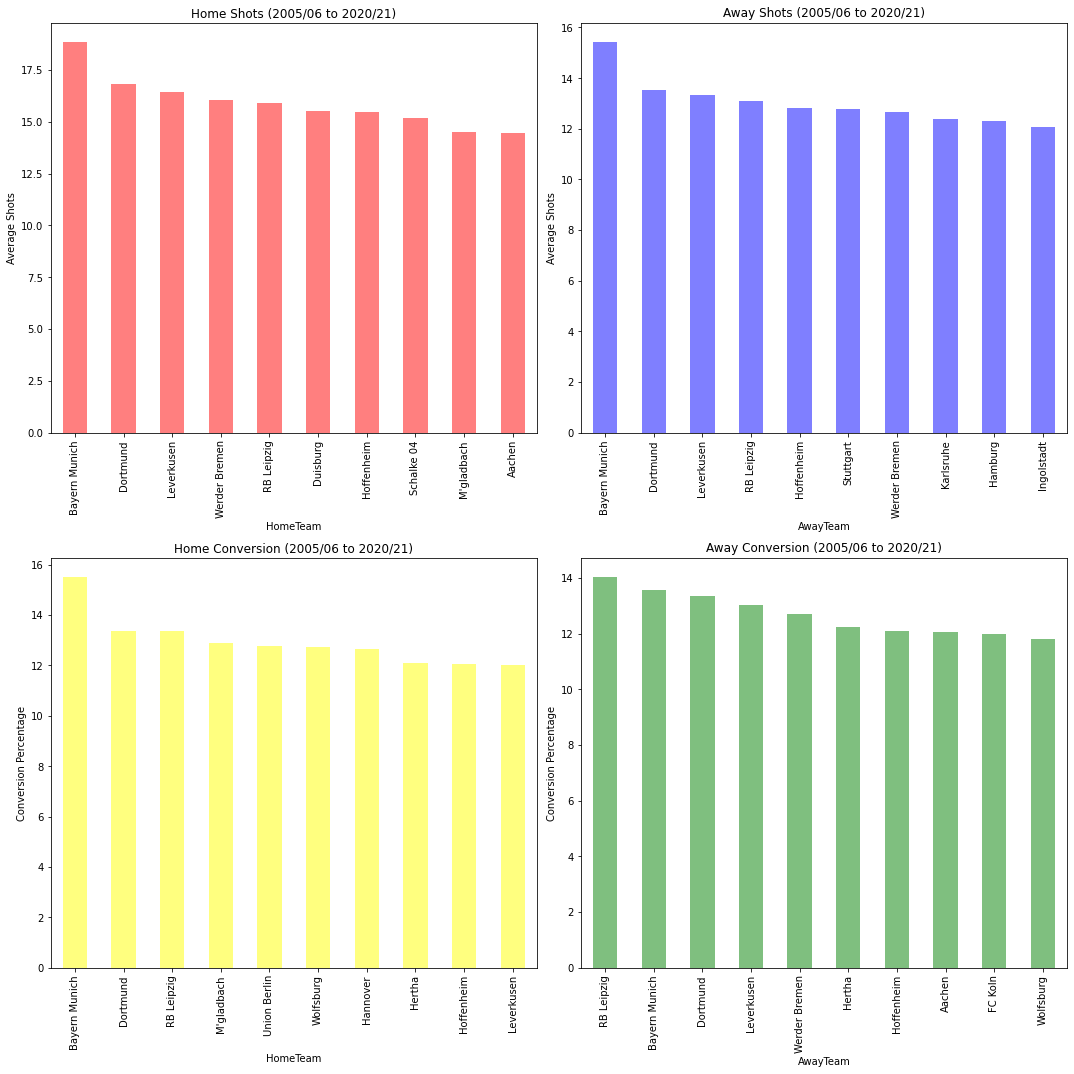

In [27]:
shots(Bundesliga)

(<Figure size 1080x1080 with 4 Axes>, array([[<matplotlib.axes._subplots.AxesSubplot object at 0x123606c10>,
      dtype=object))

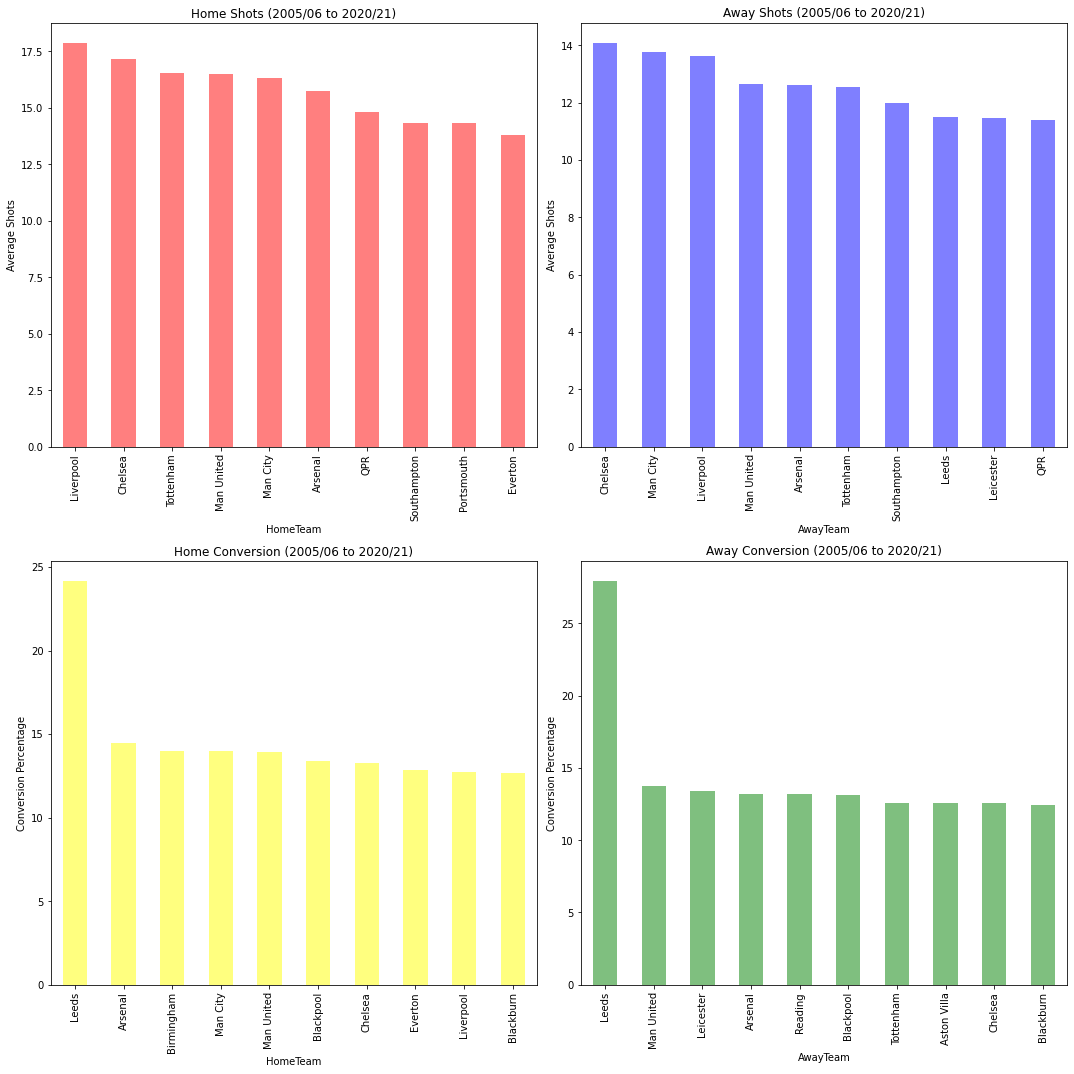

In [28]:
shots(EPL)

In [ ]:
shots(LaLiga)

In [ ]:
shots(SerieA)

In [ ]:
def goals(league):
    goals=league.copy()
    home_goals=goals.groupby(['HomeTeam'])['FTHG'].sum()
    home_goals.sort_values(axis=0, ascending=False, inplace=True)
    away_goals=goals.groupby(['AwayTeam'])['FTAG'].sum()
    away_goals.sort_values(axis=0, ascending=False, inplace=True)
    total_goals=home_goals+away_goals
    total_goals.sort_values(axis=0, ascending=True, inplace=True)
    home_mean=goals.groupby(['HomeTeam'])['FTHG'].mean()
    home_mean.sort_values(axis=0, ascending=False, inplace=True)
    away_mean=goals.groupby(['AwayTeam'])['FTAG'].mean()
    away_mean.sort_values(axis=0, ascending=False, inplace=True)
    total_mean=(home_mean+away_mean)/2
    total_mean.sort_values(axis=0, ascending=True, inplace=True)
    
    fig,axes = plt.subplots(figsize = (15,15),nrows = 2, ncols = 3)
    plt.sca(axes[0][0])
    home_goals[:10].plot(kind = 'bar',color='red',alpha = 0.5)
    plt.ylabel('Goals')
    plt.title('Home Goals (2005/06 to 2020/21)')

    plt.sca(axes[0][1])
    away_goals[:10].plot(kind = 'bar',alpha = 0.5,color='yellow')
    plt.ylabel('Goals')
    plt.title('Away Goals (2005/06 to 2020/21)')
    
    plt.sca(axes[0][2])
    total_goals.plot(kind = 'barh',color='blue')
    plt.ylabel('Goals')
    plt.title('All-teams Goals (2005/06 to 2020/21)')
    
    plt.sca(axes[1][0])
    home_mean[:10].plot(kind = 'bar',color='orange',alpha = 0.5)
    plt.ylabel('Goal Average')
    plt.title('Goal Average per Game (2005/06 to 2020/21)')

    plt.sca(axes[1][1])
    away_mean[:10].plot(kind = 'bar',alpha = 0.5,color='brown')
    plt.ylabel('Goal Average')
    plt.title('Goal Average per Game (2005/06 to 2020/21)')
    
    plt.sca(axes[1][2])
    total_mean.plot(kind = 'barh',color='blue')
    plt.ylabel('Goals')
    plt.title('All-teams Average per Game (2005/06 to 2020/21)')
    
    fig.tight_layout(pad=1)
    return fig,axes
    
    
    
    

In [ ]:
goals(Bundesliga)

In [ ]:
goals(EPL)

In [ ]:
goals(LaLiga)

In [ ]:
goals(SerieA)

In [23]:

total_df=pd.concat([Bundesliga,EPL,LaLiga,SerieA],axis=0)

In [24]:
total_df

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,B365H,B365D,B365A,season
0,05/08/2005,Bayern Munich,M'gladbach,3.0,0.0,H,19.0,10.0,1.30,5.00,9.50,200506
1,06/08/2005,Duisburg,Stuttgart,1.0,1.0,D,11.0,11.0,2.75,3.25,2.25,200506
2,06/08/2005,FC Koln,Mainz,1.0,0.0,H,14.0,19.0,2.10,3.25,3.00,200506
3,06/08/2005,Hamburg,Nurnberg,3.0,0.0,H,12.0,17.0,1.57,3.40,5.50,200506
4,06/08/2005,Hannover,Hertha,2.0,2.0,D,12.0,15.0,2.40,3.20,2.60,200506
...,...,...,...,...,...,...,...,...,...,...,...,...
24,04/10/2020,Benevento,Bologna,1.0,0.0,H,6.0,13.0,3.10,3.60,2.20,202021
25,04/10/2020,Lazio,Inter,1.0,1.0,D,11.0,10.0,3.10,3.70,2.20,202021
26,04/10/2020,Parma,Verona,1.0,0.0,H,7.0,8.0,2.87,3.10,2.62,202021
27,04/10/2020,Milan,Spezia,3.0,0.0,H,10.0,3.0,1.28,5.50,11.00,202021


# Poisson Distribution

The analysis of this distribution will consist on applying the model to a fixed season, taking into account the previous four, in order to check the effectiveness of the distribution

In [ ]:
#defining a function to arrange each dataframe per season, starting in the 2008-09 season (the first one to posses
# four previous record seasons)

def df_array(season_number,league):
    league['season']=league['season'].astype(str).astype(int)
    s_df=league.loc[(league.season >= season_number-303) & (league.season <= season_number)] 
    #303 represents going further 3 seasons
    return s_df


In [ ]:
%%time
#let´s check the effectiveness choosing 4 seasons to test, the ones that group 3 previous seasons:
#2021: 1920,1819,1718
#1617: 1516,1415,1314
#1213: 1112,1011,0910
#0809: 0708,0607,0506


season_08_09=df_array(200809,Bundesliga)
season_12_13=df_array(201213,Bundesliga)
season_16_17=df_array(201617,Bundesliga)
season_20_21=df_array(202021,Bundesliga)


In [ ]:
##Adding the expected goals based on poisson distribution with the data from the previous 5 tournaments
def teams_strength_and_predictor(df,home,away):
    HomeTeam = df[['HomeTeam', 'FTHG', 'FTAG']].rename(
        columns={'HomeTeam':'Team', 'FTHG':'HomeScored', 'FTAG':'HomeConceded'}).groupby(
        ['Team'], as_index=False)[['HomeScored', 'HomeConceded']].mean()

    AwayTeam = df[['AwayTeam', 'FTHG', 'FTAG']].rename(
        columns={'AwayTeam':'Team', 'FTHG':'AwayConceded', 'FTAG':'AwayScored'}).groupby(
        ['Team'], as_index=False)[['AwayScored', 'AwayConceded']].mean()

    # Overall - Average {leagueHomeScored, leagueHomeConceded, leagueAwayScored, leagueAwayConceded}
    leagueHomeScored, leagueHomeConceded = HomeTeam['HomeScored'].mean(), HomeTeam['HomeConceded'].mean()
    leagueAwayScored, leagueAwayConceded = AwayTeam['AwayScored'].mean(), AwayTeam['AwayConceded'].mean()

    TeamStrength = pd.merge(HomeTeam, AwayTeam, on='Team')

    assert(leagueHomeScored != 0)
    assert(leagueHomeConceded != 0)
    assert(leagueAwayScored != 0)
    assert(leagueAwayConceded != 0)

    # Normalize the parameters 
    # For each team - {HomeAttack, HomeDefence, AwayAttack, AwayDefense}
    TeamStrength['HomeScored'] /= leagueHomeScored
    TeamStrength['HomeConceded'] /= leagueHomeConceded
    TeamStrength['AwayScored'] /= leagueAwayScored
    TeamStrength['AwayConceded'] /= leagueAwayConceded

    TeamStrength.columns=['Team','HomeAttack','HomeDefense','AwayAttack','AwayDefense']
    TeamStrength.set_index('Team', inplace=True)
    overallHomeScored = (leagueHomeScored+leagueAwayConceded)/2
    overallAwayScored = (leagueHomeConceded+leagueAwayScored)/2
    
    #after getting teams strength, we preceed to find the probabilities and expected scores
    
    if home in TeamStrength.index and away in TeamStrength.index:
        H = TeamStrength.at[home,'HomeAttack'] * TeamStrength.at[away,'AwayDefense'] * overallHomeScored
        A = TeamStrength.at[away,'AwayAttack'] * TeamStrength.at[home,'HomeDefense'] * overallAwayScored
        probH, probA, probT = 0, 0, 0  # Probability of Home win(H), Away win(A) or Tie(T) 
        for X in range(0,10):
            for Y in range(0, 10):
                p = poisson.pmf(X,H) * poisson.pmf(Y,A)
                if X == Y:
                    probT += p
                elif X > Y:
                    probH += p
                else:
                    probA += p
        HomeProb=round(probH*100,2)
        TieProb=round(probT*100,2)
        AwayProb=round(probA*100,2)
        scoreH = 3 * probH + probT
        scoreA = 3 * probA + probT
        return (scoreH,scoreA,HomeProb,TieProb,AwayProb)
    else:
        return (0,0,0,0,0)


In [ ]:
def predictor(season):
    dummy=season.copy()
    Home_goals=[]
    Away_goals=[]
    home_chance=[]
    tie_chance=[]
    away_chance=[]
    for index, row in dummy.iterrows():
        home, away = row['HomeTeam'], row['AwayTeam']
        rH,rA,cH,cT,cA = teams_strength_and_predictor(season,home,away)
        Home_goals.append(round(rH,2))
        Away_goals.append(round(rA,2))
        home_chance.append(round(cH,2))
        tie_chance.append(round(cT,2))
        away_chance.append(round(cA,2))
    
    dummy['HomeExpectedGoals']=Home_goals
    dummy['AwayExpectedGoals']=Away_goals
    dummy['HomeProbability']=home_chance
    dummy['TieProbability']=tie_chance
    dummy['AwayProbability']=away_chance
    
    return dummy
    
    

In [ ]:
%%time
#Here the function gets the Poisson prediction for every season since 08_09

s0809=predictor(season_08_09)

s1213=predictor(season_12_13)

s1617=predictor(season_16_17)

s2021=predictor(season_20_21)


In [ ]:
s1213

In [ ]:

seasons_poisson=pd.concat([s0809,s1213,s1617,s2021])
seasons_poisson.drop(['HS','AS','B365H','B365D','B365A'], axis=1, inplace=True)
seasons_poisson


In [ ]:
selected_seasons=[200809,201213,201617,202021]
final_poisson = seasons_poisson[seasons_poisson['season'].isin(selected_seasons)] 
final_poisson

In [ ]:
def predicted(row):
    if (row['HomeProbability']-row['AwayProbability'])<=5.0 and (row['AwayProbability']-row['HomeProbability'])<=5.0:
        res='D'
    elif row['HomeProbability']>row['AwayProbability'] and row['HomeProbability']>row['TieProbability']:
        res='H'
    elif row['HomeProbability']<row['AwayProbability'] and row['AwayProbability']>row['TieProbability']:
        res='A'
    elif row['HomeProbability']<row['TieProbability'] and row['AwayProbability']<row['TieProbability']:
        res='D'
    
    return res

In [ ]:
final_poisson['PoissonPredicted']=final_poisson.apply(predicted,axis=1)

In [ ]:
final_poisson

In [ ]:
conditions  = [ final_poisson['FTR'] =='H', final_poisson['FTR'] =='D', final_poisson['FTR'] =='A']
choices     = [ 1, 0, -1 ]
    
final_poisson['FTR_N'] = np.select(conditions, choices, default=np.nan)

In [ ]:
conditions_  = [ final_poisson['PoissonPredicted'] =='H', final_poisson['PoissonPredicted'] =='D', final_poisson['PoissonPredicted'] =='A']
choices_     = [ 1, 0, -1 ]
    
final_poisson['PoissonPredicted_N'] = np.select(conditions_, choices_, default=np.nan)

In [ ]:
final_poisson

In [ ]:
tester=final_poisson.copy()
tester=tester.drop(['Date','HomeTeam','AwayTeam','FTR','season','PoissonPredicted'],axis=1)
tester

In [ ]:
X=tester.drop('FTR_N',axis=1)
y=tester[['FTR_N']]


In [ ]:

X_train, X_test, y_train, y_test=tts(X,y,test_size=.2)


In [ ]:
linreg=LinReg()

linreg.fit(X_train, y_train)

In [ ]:
train_score=linreg.score(X_train, y_train)   # R2
test_score=linreg.score(X_test, y_test)

print ("Linear Regression train score:",train_score,"and test score:", test_score)

In [ ]:
#Gaussian Naive Bayes

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

print("The accuracy of the Gaussian Naive Bayes test is:",round(acc(y_test, y_pred)*100,2),'%')

In [ ]:
cm(y_test, y_pred)

In [ ]:
ax=sns.heatmap(cm(y_test, y_pred)/sum(sum(cm(y_test, y_pred))), annot=True)

b, t=ax.get_ylim()
ax.set_ylim(b+1, t-1)

In [ ]:
#Bernoulli Naive Bayes

bnb = BernoulliNB ()
y_pred = bnb.fit(X_train, y_train).predict(X_test)

print("The accuracy of the Bernoulli Naive Bayes test is:",round(acc(y_test, y_pred)*100,2),'%')

In [ ]:
cm(y_test, y_pred)

In [ ]:
ax=sns.heatmap(cm(y_test, y_pred)/sum(sum(cm(y_test, y_pred))), annot=True)

b, t=ax.get_ylim()
ax.set_ylim(b+1, t-1)

# Bookers probabilities

With the Bet365 picks we can know who was the favorite team in each match(the minor odd), but the question here is, how accurate it´s the betting site prediction to pick the right team?

In [ ]:
b365_LaLiga=LaLiga.copy()
b365_Bundesliga=Bundesliga.copy()
b365_SerieA=SerieA.copy()
b365_EPL=EPL.copy()

In [ ]:
b365_Bundesliga.drop(['HS','AS','season'],axis=1,inplace=True)

In [ ]:
B365_H=b365_Bundesliga['B365H'].to_list()
B365_D=b365_Bundesliga['B365D'].to_list()
B365_A=b365_Bundesliga['B365A'].to_list()

In [ ]:

B365Result=[]
c=0
while c<len(B365_H):
    if B365_H[c]<B365_D[c] and B365_H[c]<B365_A[c]:
        B365Result.append('H')
    elif B365_D[c]<B365_H[c] and B365_D[c]<B365_A[c]:
        B365Result.append('D')
    elif B365_A[c]<B365_H[c] and B365_A[c]<B365_D[c]:
        B365Result.append('A')
    elif B365_H[c]==B365_D[c] or B365_H[c]==B365_A[c]:
        B365Result.append('H')
    elif B365_A[c]==B365_D[c] or B365_H[c]==B365_A[c]:
        B365Result.append('A')
    
        
        
    else:
        B365Result.append('N')
        
    c+=1
        

                
            

In [ ]:
set(B365Result)

In [ ]:
len(B365Result)

In [ ]:
b365_Bundesliga

In [ ]:
b365_Bundesliga['B365Result']=B365Result

In [ ]:
conditions365  = [ b365_Bundesliga['FTR'] =='H', b365_Bundesliga['FTR'] =='D', b365_Bundesliga['FTR'] =='A']
choices365     = [ 1, 0, -1 ]
    
b365_Bundesliga['FTR_N'] = np.select(conditions365, choices365, default=np.nan)

In [ ]:
conditions_365  = [ b365_Bundesliga['B365Result'] =='H', b365_Bundesliga['B365Result'] =='D', b365_Bundesliga['B365Result'] =='A']
choices_365     = [ 1, 0, -1 ]
    
b365_Bundesliga['PoissonPredicted_N'] = np.select(conditions_365, choices_365, default=np.nan)

In [ ]:
b365_Bundesliga

In [ ]:
tester=b365_Bundesliga.copy()
tester=tester.drop(['Date','HomeTeam','AwayTeam','FTR','B365Result'],axis=1)
tester

In [ ]:
X=tester.drop('FTR_N',axis=1)
y=tester[['FTR_N']]

In [ ]:
X_train, X_test, y_train, y_test=tts(X,y,test_size=.2)


In [ ]:
linreg.fit(X_train, y_train)

In [ ]:
train_score=linreg.score(X_train, y_train)   # R2
test_score=linreg.score(X_test, y_test)

print (train_score, test_score)

In [ ]:
#Gaussian Naive Bayes

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

print("The accuracy of the Gaussian Naive Bayes test is:",round(acc(y_test, y_pred)*100,2),'%')

In [ ]:
cm(y_test, y_pred)

In [ ]:
ax=sns.heatmap(cm(y_test, y_pred)/sum(sum(cm(y_test, y_pred))), annot=True)

b, t=ax.get_ylim()
ax.set_ylim(b+1, t-1)

In [ ]:
#Bernoulli Naive Bayes

bnb = BernoulliNB ()
y_pred = bnb.fit(X_train, y_train).predict(X_test)

print("The accuracy of the Bernoulli Naive Bayes test is:",round(acc(y_test, y_pred)*100,2),'%')

In [ ]:
cm(y_test, y_pred)

In [ ]:
ax=sns.heatmap(cm(y_test, y_pred)/sum(sum(cm(y_test, y_pred))), annot=True)

b, t=ax.get_ylim()
ax.set_ylim(b+1, t-1)